# Análisis Exploratorio

Dataset link: https://www.kaggle.com/olistbr/brazilian-ecommerce

## Contenido:
### Wrangling:
* Importamos Librerías


* Carga y Limpieza de los Datos

### Visualiazciones y algunos Insights:

* Nulos

* Histograma

* Correlograma

* Tipo de pago mas frecuente

* Distribucion de montos de pago por cliente

* Cantidad de clientes por estado

* Productos mas demandados

* Productos mejor rankeados

* Estados con mejor ranking

* Precio vs Costo de Envio

### Importamos Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
import random


%matplotlib inline
sns.set()
pd.options.display.max_columns = None


Bad key text.latex.unicode in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to 

### Carga de datos

#### Customers

In [2]:
customers=pd.read_csv("../Proyecto4/customers.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info() #no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation

In [4]:
geo=pd.read_csv("../Proyecto4/geolocation.csv")
geo.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geo.info() #no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Items

In [6]:
items=pd.read_csv("../Proyecto4/items.csv")
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
items.info() #no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Payments

In [8]:
payments=pd.read_csv("../Proyecto4/payments.csv")


In [9]:
payments.info()#no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#### Reviews

In [10]:
reviews = pd.read_csv("../Proyecto4/reviews.csv")

In [11]:
reviews.info()#hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### Orders

In [12]:
orders=pd.read_csv("../Proyecto4/orders.csv")

In [13]:
orders.info()#hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Products

In [14]:
products=pd.read_csv("../Proyecto4/products.csv")

In [15]:
products.info()#hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Sellers

In [16]:
sellers=pd.read_csv("../Proyecto4/sellers.csv")

In [17]:
sellers.info() #no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Agrego los datos de geolocalización a Sellers y Customers

In [18]:
#sellers = pd.merge(sellers, geo, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
#sellers.columns

In [19]:
#sellers = sellers.drop(['geolocation_state','geolocation_city','geolocation_zip_code_prefix'], axis=1)
#sellers = sellers.rename(columns={'geolocation_lat':'seller_geolocation_lat', 'geolocation_lng':'seller_geolocation_lng'})

In [20]:
#customers = pd.merge(customers, geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
#sellers.columns

In [21]:
#customers = customers.drop(['geolocation_state','geolocation_city','geolocation_zip_code_prefix'], axis=1)
#customers = customers.rename(columns={'geolocation_lat':'customer_geolocation_lat', 'geolocation_lng':'cusotmer_geolocation_lng'})

## Creamos un sólo Dataframe con los demás

In [22]:
#df = orders
#df = df.merge(customers, on='customer_id', indicator=True)

In [23]:
#df = df.merge(reviews, on='order_id')

In [24]:
#df = df.merge(payments, on='order_id')

In [25]:
#df = df.merge(items, on = 'order_id')

In [26]:
#df = df.merge(products, on = 'product_id')

In [27]:
#df = df.merge(sellers, on = 'seller_id')
#df = df.rename(sellers, 'seller_zip_code_prefix')

In [28]:
#df = df.merge(geo, on = 'zip_code_prefix')

In [29]:
df=pd.read_csv("../Data/df.csv")  #Importo directamente el df ya joineado de la otra notebook

Pasamos a timestamp los valores de fechas:

In [30]:
from datetime import datetime
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374066 entries, 0 to 374065
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     374066 non-null  int64         
 1   order_id                       374066 non-null  object        
 2   order_item_id                  374066 non-null  float64       
 3   product_id                     374066 non-null  object        
 4   seller_id                      374066 non-null  object        
 5   shipping_limit_date            374066 non-null  datetime64[ns]
 6   price                          374066 non-null  float64       
 7   costo_envio                    374066 non-null  float64       
 8   review_id                      374066 non-null  object        
 9   review_score                   374066 non-null  int64         
 10  review_comment_title           48898 non-null   object        
 11  

# Visualizaciones

In [31]:
df.shape

(374066, 44)

### % de Nulos

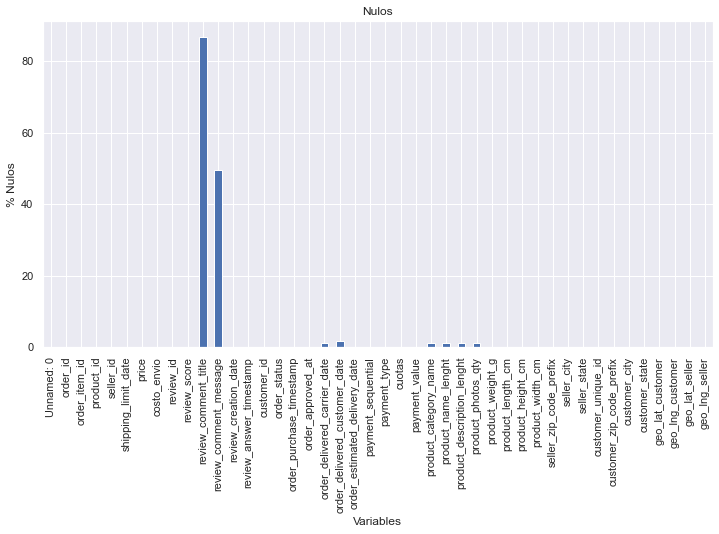

In [32]:
(df.isnull().mean()*100).plot.bar(figsize=(12,6)) 
plt.ylabel('% Nulos') 
plt.xlabel('Variables') 
plt.title('Nulos');

Dado la cantidad de nulos de las columnas review_comment_title y review_comment_message (casi 90% y 60% respectivamente) vamos a eliminas dichas columnas:

In [33]:
df = df.drop(['review_comment_title','review_comment_message'], axis=1)

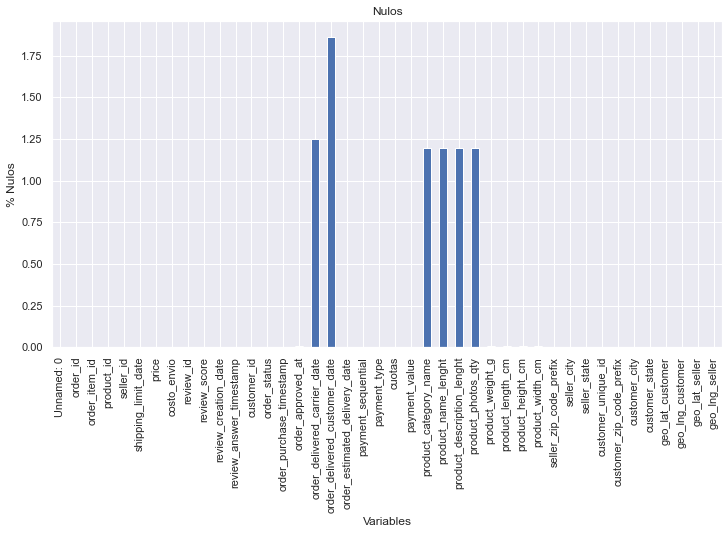

In [34]:
(df.isnull().mean()*100).plot.bar(figsize=(12,6)) 
plt.ylabel('% Nulos') 
plt.xlabel('Variables') 
plt.title('Nulos');

Como el resto de los nulos apenas supera el 2% vamos a eliminar dichas observaciones:

In [35]:
df = df.dropna()

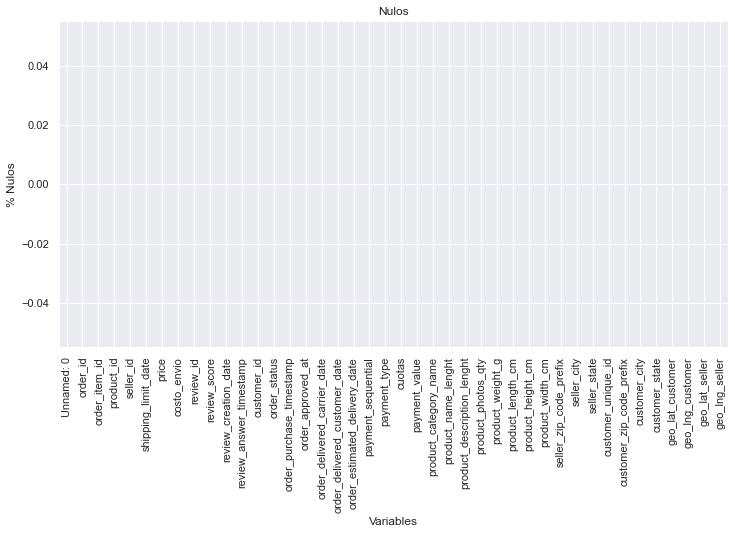

In [36]:
(df.isnull().mean()*100).plot.bar(figsize=(12,6)) 
plt.ylabel('% Nulos') 
plt.xlabel('Variables') 
plt.title('Nulos');

Visualizamos la cantidad de casos por variable

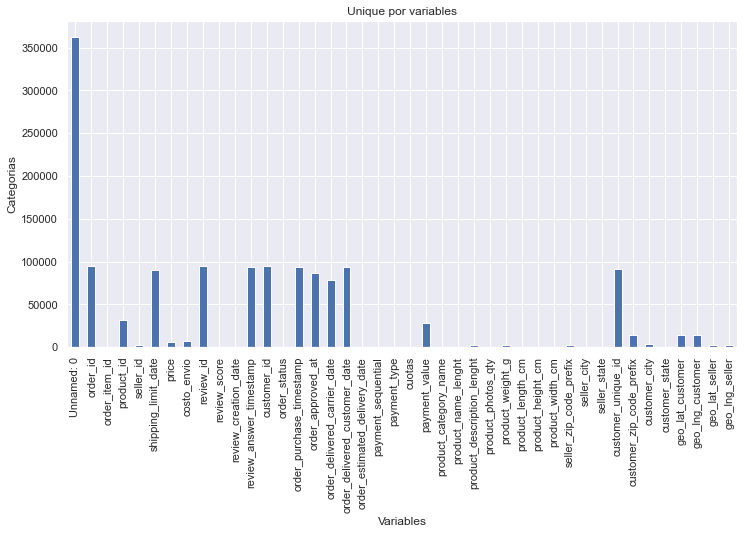

In [37]:
df.nunique().plot.bar(figsize=(12,6)) 
plt.ylabel('Categorias') 
plt.xlabel('Variables') 
plt.title('Unique por variables');

Observamos la correlación entre las variables numéricas:

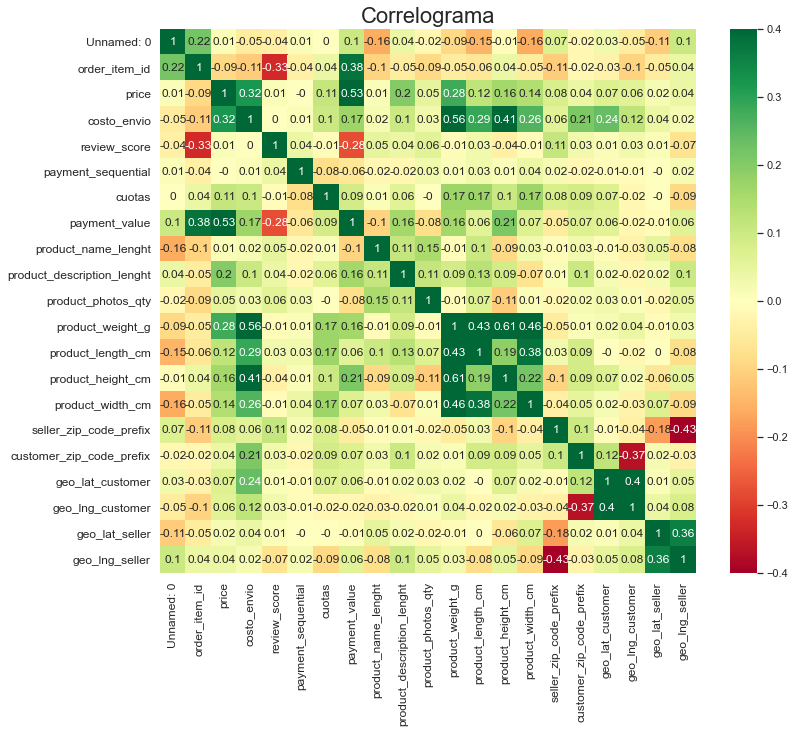

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn',vmin=-0.4, vmax=0.4, center=0, annot=True)

plt.title('Correlograma', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Vemos que hay variables correlacionadas, vamos a buscar las correlaciones mayores a 0,5:

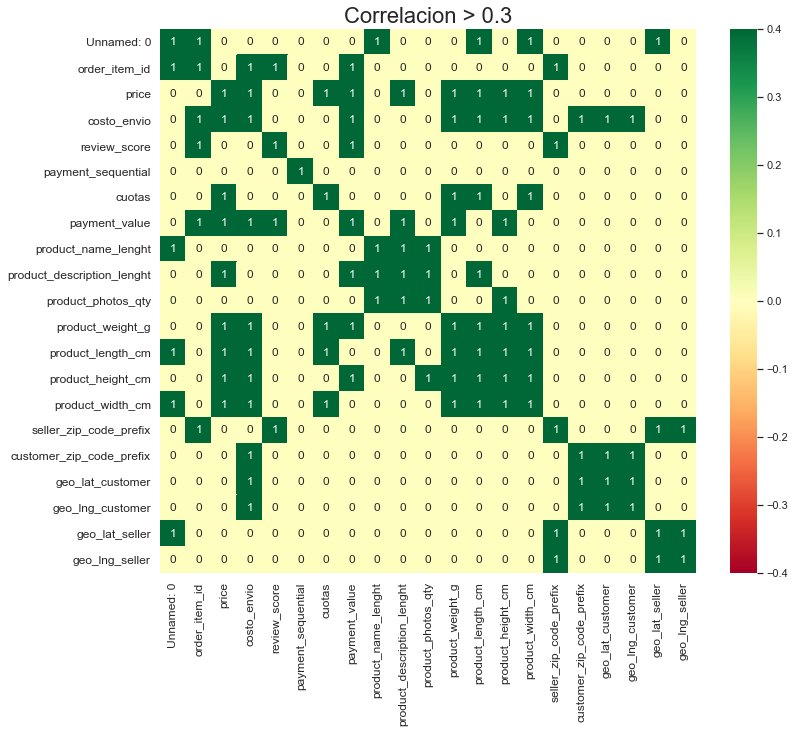

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr().round(2))>0.1 , xticklabels=df.corr().columns,vmin=-0.4, vmax=0.4, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlacion > 0.3', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Creamos una lista con los pares de variables con correlacion > 0.5:

In [40]:
variables_correlacionadas = []

for i in (abs(df.corr().round(2))>0.11).columns:
    for j in (abs(df.corr().round(2))>0.11).columns:
        if ((abs(df.corr().round(2))>0.11).loc[i,j] == True):
            variables_correlacionadas.append((i,j))

Nos quedamos sólo con los pares de variables diferentes:

In [41]:
variables_correlacionadas_diferentes = []

for k in range(len(variables_correlacionadas)):
    if variables_correlacionadas[k][0] != variables_correlacionadas[k][1]:
        variables_correlacionadas_diferentes.append((variables_correlacionadas[k][0], variables_correlacionadas[k][1]))

variables_correlacionadas_diferentes

[('Unnamed: 0', 'order_item_id'),
 ('Unnamed: 0', 'product_name_lenght'),
 ('Unnamed: 0', 'product_length_cm'),
 ('Unnamed: 0', 'product_width_cm'),
 ('order_item_id', 'Unnamed: 0'),
 ('order_item_id', 'review_score'),
 ('order_item_id', 'payment_value'),
 ('price', 'costo_envio'),
 ('price', 'payment_value'),
 ('price', 'product_description_lenght'),
 ('price', 'product_weight_g'),
 ('price', 'product_length_cm'),
 ('price', 'product_height_cm'),
 ('price', 'product_width_cm'),
 ('costo_envio', 'price'),
 ('costo_envio', 'payment_value'),
 ('costo_envio', 'product_weight_g'),
 ('costo_envio', 'product_length_cm'),
 ('costo_envio', 'product_height_cm'),
 ('costo_envio', 'product_width_cm'),
 ('costo_envio', 'customer_zip_code_prefix'),
 ('costo_envio', 'geo_lat_customer'),
 ('costo_envio', 'geo_lng_customer'),
 ('review_score', 'order_item_id'),
 ('review_score', 'payment_value'),
 ('cuotas', 'product_weight_g'),
 ('cuotas', 'product_length_cm'),
 ('cuotas', 'product_width_cm'),
 ('pay

Observamos la correlación entre product_weight_g y freight_value con una linea de regresión:

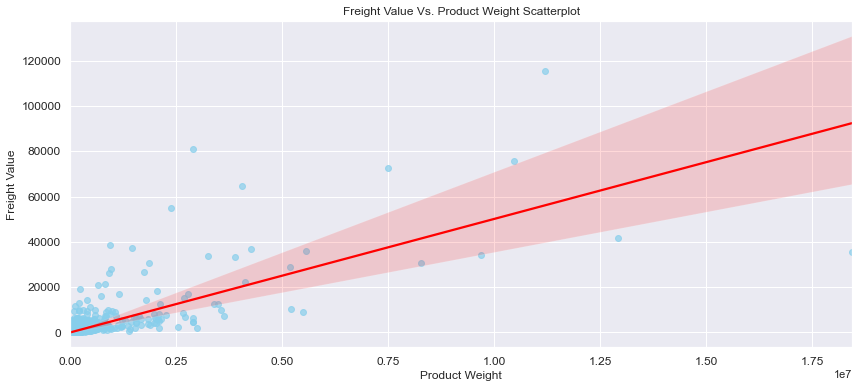

In [42]:
plt.figure(figsize=(14,6))

product_weight_g_reg = df.groupby('customer_id').sum()[['product_weight_g','costo_envio']].reset_index()['product_weight_g']
freight_value_reg = df.groupby('customer_id').sum()[['product_weight_g','costo_envio']].reset_index()['costo_envio']
sns.regplot(x=product_weight_g_reg, y=freight_value_reg, scatter_kws={'alpha':0.7, 'color':'skyblue'},\
           line_kws={'color':'red'});

plt.title('Freight Value vs. Product Weight Scatterplot'.title(), fontsize=12)
plt.xlabel('Product Weight'.title(), fontsize=12)
plt.ylabel('Freight Value'.title(), fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Histograma general:

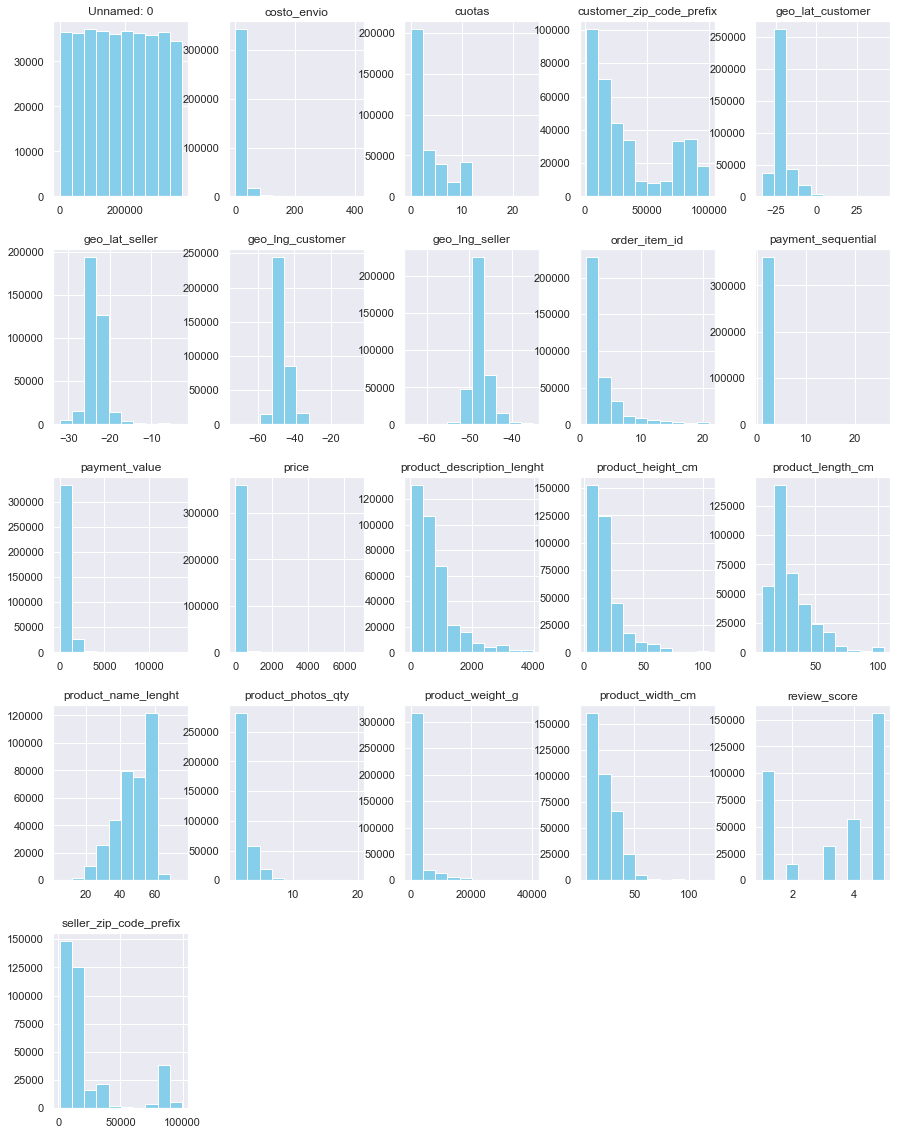

In [43]:
df.hist(figsize=(15,20), color='skyblue');

### Análisis de algunas variables aisladas:

Tipo de pago por cliente

In [44]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

Observamos el tipo de pago mas frecuente:

In [45]:
payment_type_count_plot_df = df[['payment_type','customer_id']].groupby(['customer_id', 'payment_type']).count().reset_index()

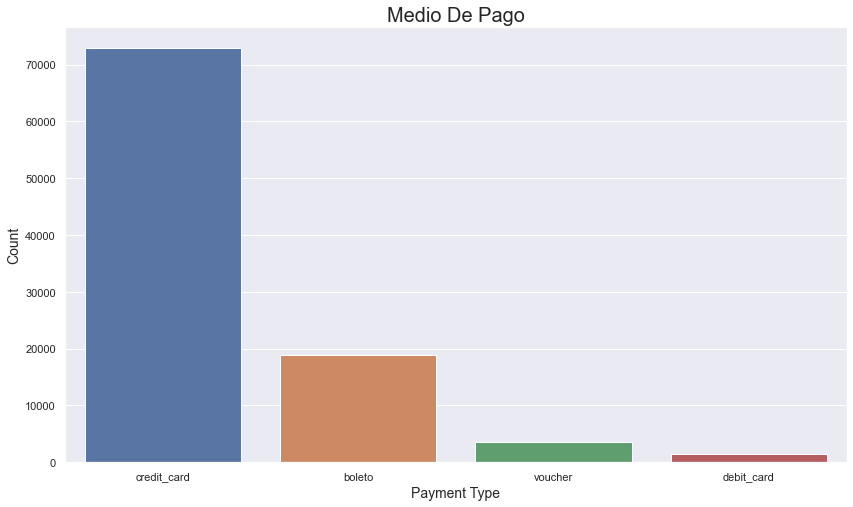

In [46]:
plt.figure(figsize=(14,8))

sns.countplot(payment_type_count_plot_df['payment_type']);

plt.title('Medio de Pago'.title() , fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('payment type'.title(), fontsize=14);

Montos de Pago por cliente

In [47]:
df.groupby('customer_id').sum().reset_index()['payment_value'].describe()

count    9.465800e+04
mean     1.828194e+03
std      9.130393e+04
min      9.590000e+00
25%      6.290000e+01
50%      1.110200e+02
75%      2.093000e+02
max      1.810240e+07
Name: payment_value, dtype: float64

Como vemos gran diferencia entre el 75% y el máximo graficamos los montos de pago hasta R1000

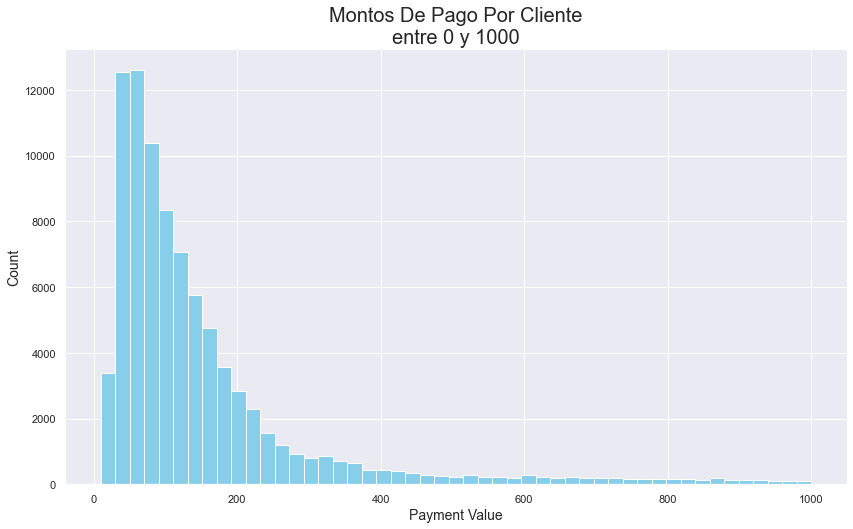

In [48]:
plt.figure(figsize=(14,8))

min_order_payment_value = min(df.groupby('customer_id').sum().reset_index()['payment_value'])
max_order_payment_value = max(df.groupby('customer_id').sum().reset_index()['payment_value'])

bins= np.linspace(start=min_order_payment_value, stop=1000, num=50)
plt.hist(x=np.asarray(df.groupby('customer_id').sum().reset_index()['payment_value']), bins=bins,\
         color='skyblue');

plt.title('Montos de pago por cliente'.title()+'\n'+'entre 0 y 1000' , fontsize=20);
plt.ylabel('count'.title(), fontsize=14, rotation=90);
plt.xlabel('payment value'.title(), fontsize=14);


Ahora graficamos los pagos más altos, de 1000 al max:

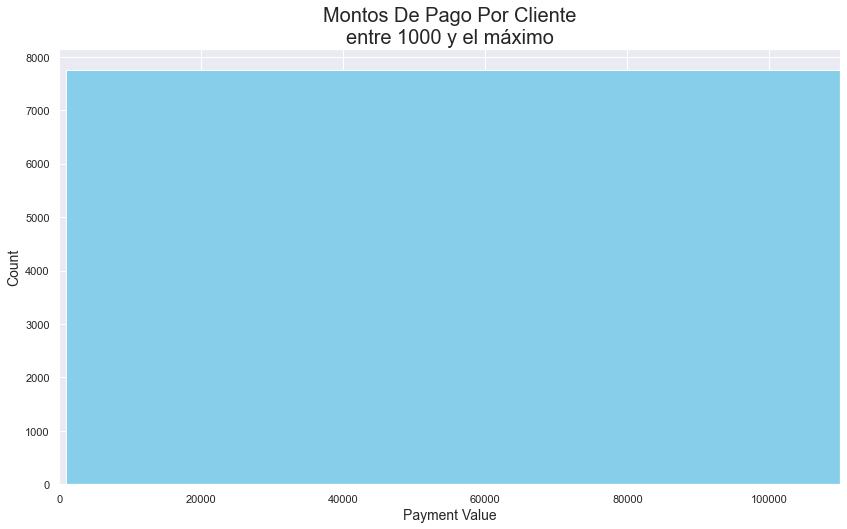

In [49]:
plt.figure(figsize=(14,8))

bins= np.linspace(start=1000, stop=max_order_payment_value, num=60)
plt.hist(x=np.asarray(df.groupby('customer_id').sum().reset_index()['payment_value']), bins=bins,\
         color='skyblue');

plt.xlim(0,110000);
plt.title('Montos de pago por cliente'.title()+'\n'+'entre 1000 y el máximo' , fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('payment value'.title(), fontsize=14);


Clientes por estado:

In [50]:
customer_state_count_df = df.groupby(['customer_id','customer_state']).count().reset_index()

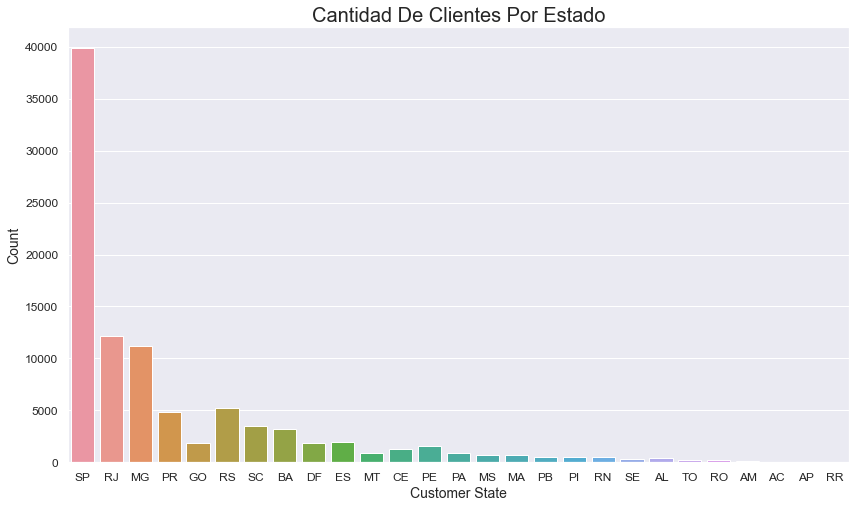

In [51]:
plt.figure(figsize=(14,8))
sns.countplot(customer_state_count_df.customer_state, order=df.customer_state.value_counts().index);

plt.title('Cantidad de clientes por estado'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('customer state'.title(), fontsize=14);

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Productos:

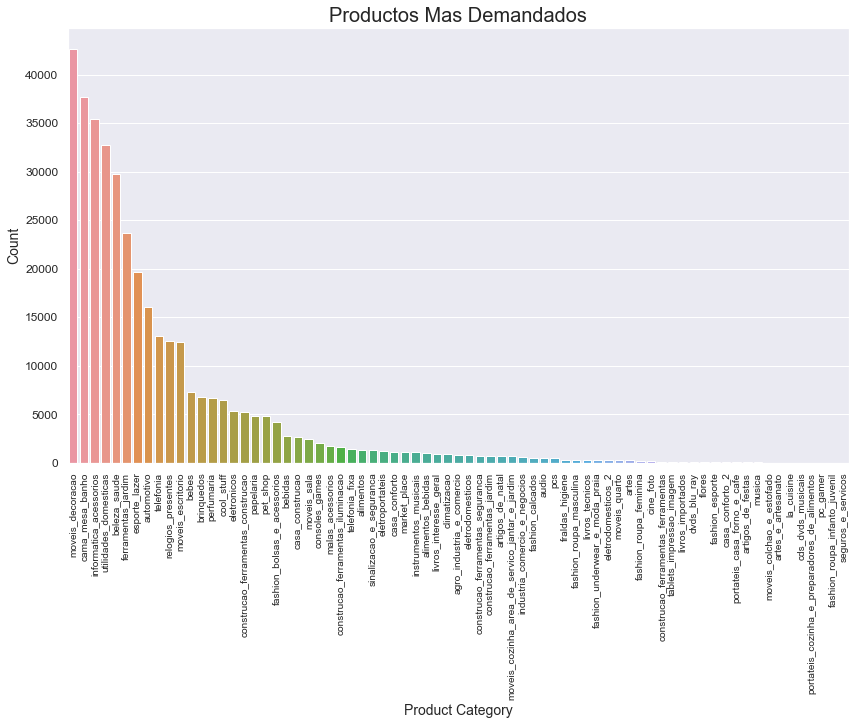

In [52]:
plt.figure(figsize=(14,8))

sns.countplot(df.product_category_name,#
              order=df.product_category_name.value_counts().index)

plt.title('Productos mas demandados'.title(), fontsize=20);
plt.ylabel('count'.title(), fontsize=14);
plt.xlabel('product category'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize=10);
plt.yticks(fontsize=12)
plt.show()

# Review Score


Por categoria de producto:

In [53]:
mean_score_vs_cat_df = df.groupby(['product_category_name']).mean()['review_score'].reset_index()

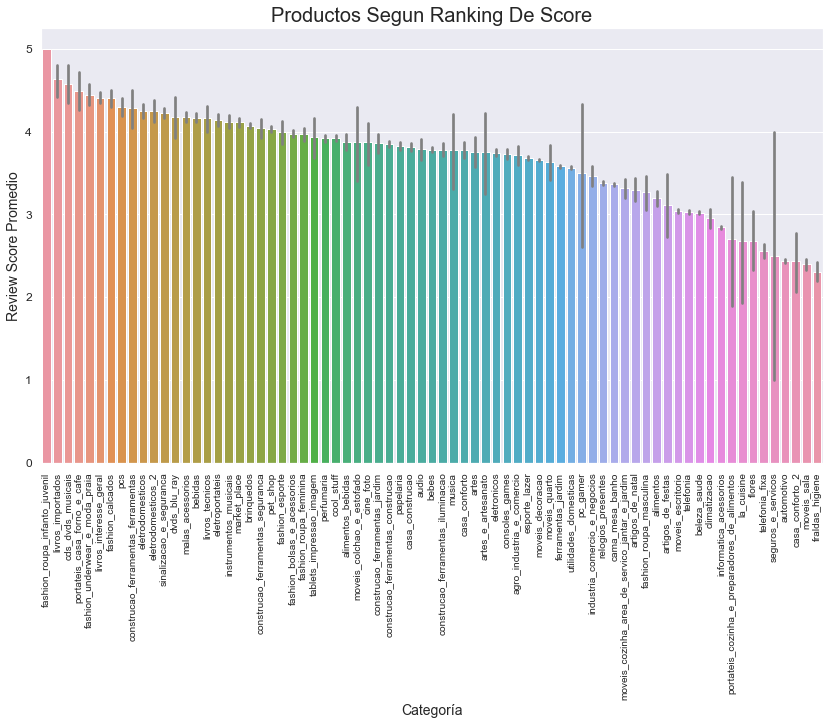

In [54]:
plt.figure(figsize=(14,8))

sns.barplot(data = df, x='product_category_name', y='review_score',\
           order = df.groupby('product_category_name').mean()\
            .reset_index().sort_values('review_score', ascending=False)['product_category_name'].values,
           errcolor = 'grey');

plt.title('Productos segun ranking de score'.title(), fontsize=20);
plt.ylabel('Review Score Promedio'.title(), fontsize=14);
plt.xlabel('Categoría'.title(), fontsize=14);

plt.xticks(rotation=90, fontsize= 10);
plt.yticks(fontsize=12)
plt.show()

Por Estado:

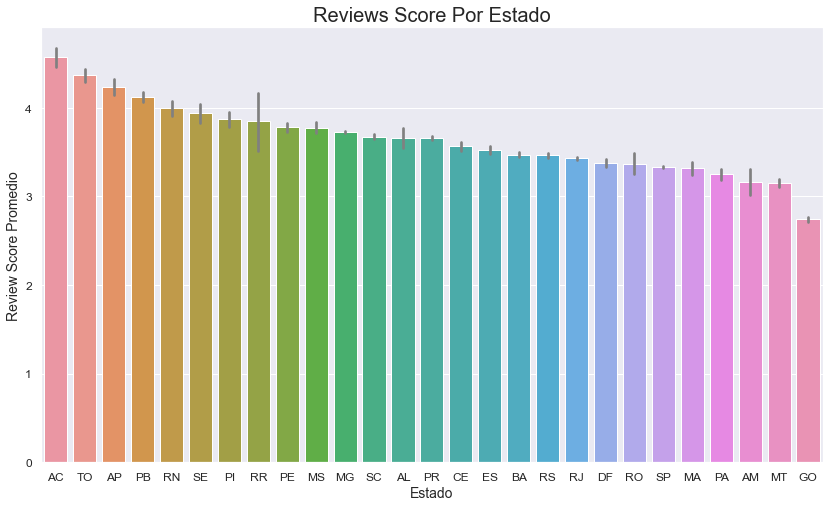

In [55]:
plt.figure(figsize=(14,8))

sns.barplot(data = df, x='customer_state', y='review_score',\
           order = df.groupby('customer_state').mean()\
            .reset_index().sort_values('review_score', ascending=False)['customer_state'].values,
           errcolor = 'grey');


plt.title('Reviews Score por Estado'.title(), fontsize=20);
plt.ylabel('Review Score Promedio'.title(), fontsize=14);
plt.xlabel('Estado'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()

Relacion entre payment y costo de envío:

In [56]:
payment_vs_freight_df = df.groupby('customer_id').sum().reset_index()[['payment_value','costo_envio']]

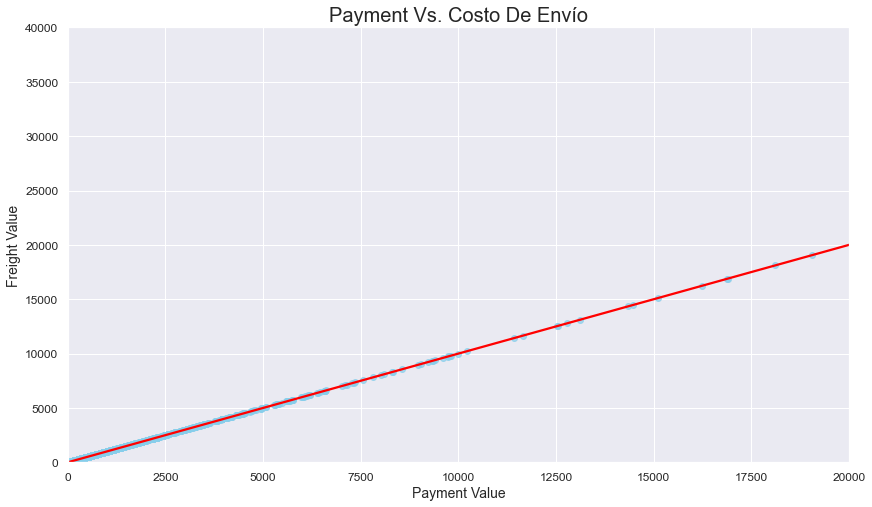

In [57]:
plt.figure(figsize=(14,8))
sns.regplot(data=payment_vs_freight_df, x=payment_vs_freight_df.costo_envio, y=payment_vs_freight_df.costo_envio,
            scatter_kws={'alpha':0.7, 'color':'skyblue'}, line_kws={'color':'red'});
plt.xlim(0,20000);
plt.ylim(0,40000)

plt.title('Payment vs. Costo de envío'.title(), fontsize=20);
plt.ylabel('Freight value'.title(), fontsize=14);
plt.xlabel('Payment Value'.title(), fontsize=14);

plt.xticks(rotation=0, fontsize= 12);
plt.yticks(fontsize=12)
plt.show()